In [1]:
import pandas as pd
import os
import numpy as np

In [94]:
df_cct = pd.read_csv("credit_card_transactions-ibm_v2.csv")
df_cards = pd.read_csv("sd254_cards.csv")
df_users = pd.read_csv("sd254_users.csv")
df_cctu0 = pd.read_csv("User0_credit_card_transactions.csv")

In [95]:
# Supprimer les dollars :

df_cct["Amount"] = df_cct["Amount"].str.replace("$","")

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
# Convertir les "Amount" en float : 
df_users['Yearly Income - Person'] = df_users['Yearly Income - Person'].str.replace("$","")

df_cct["Amount"] = df_cct["Amount"].astype(float)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [97]:
# DBSCAN 
import pandas.util.testing as tm

import seaborn as sns
from sklearn import cluster 



In [98]:
# Choisir esp et min_samples : 
# Problème 1 : besoin de float : et de variables centrées réduites)
df_cct = df_cct.copy()
df_cct["Time"] = df_cct["Time"].str.replace(":","")
df_cct["Time"] = pd.to_numeric(df_cct["Time"])





In [99]:
# On supprime Merchant City pour le moment 

df_cct = df_cct.drop([ "Merchant City"], axis=1)



In [100]:
# Transformer Use Chip en code float
pd.options.mode.chained_assignment = None
df_cct['Use Chip'][df_cct['Use Chip'] == 'Swipe Transaction'] = 0
df_cct['Use Chip'][df_cct['Use Chip'] == 'Online Transaction'] = 1
df_cct['Use Chip'][df_cct['Use Chip'] == 'Chip Transaction'] = 2

df_cct.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,621,134.09,0,3527213246127876953,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,642,38.48,0,-727612092139916043,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,622,120.34,0,-727612092139916043,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,1745,128.95,0,3414527459579106770,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,623,104.71,0,5817218446178736267,CA,91750.0,5912,NaN,No


In [101]:
df_cct1 = df_cct.copy()

In [102]:


df_cct = df_cct.head(100000)
len(df_cct)

100000

In [103]:
# Transformer Errors? en float 
# Transformer Merchant State en float 

# On travaille sur les 100000 premières lignes. 



for i,e in enumerate(df_cct["Merchant State"].unique()):
    df_cct['Merchant State'][df_cct['Merchant State'] == e] = i
df_cct['Merchant State'] = df_cct['Merchant State'].fillna(0)


for i,e in enumerate(df_cct["Errors?"].unique()):
    df_cct['Errors?'][df_cct['Errors?'] == e] = i
df_cct['Errors?'] = df_cct['Errors?'].fillna(0)
df_cct.head()


100000

In [104]:
df_cct.head(10000)['Merchant State'].unique()

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37], dtype=int64)

In [149]:
# Transformer les Is Fraud? en float : 
df_cct['Is Fraud?'][df_cct['Is Fraud?'] == 'No'] = 0
df_cct['Is Fraud?'][df_cct['Is Fraud?'] == 'Yes'] = 1


# Supprimer les lignes avec encore des NA. 

df_cct = df_cct.dropna() 



# Le jeu de donnée ne contient plus que des numeric : inconvénient : on a drop Merchant City. 

# Centrer réduire toutes les variables : (on utilise la distance euclidienne pour DBSCAN, on a besoin 
# de variables centrées réduites pour que ça fasse sens.)

for i in range(len(df_cct.columns)):
    mean = np.mean(df_cct[df_cct.columns[i]])
    ec = np.std(df_cct[df_cct.columns[i]])
    df_cct[df_cct.columns[i]] = (df_cct[df_cct.columns[i]]-mean)/ec


df_cct.head()



,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,-1.363499,-1.036766,-1.699533,0.715718,-1.672245,-1.049915,0.476883,-0.548262,0.774386,-0.47197,0.541862,-0.380008,-0.11714,-0.016171
1,-1.363499,-1.036766,-1.699533,0.715718,-1.672245,-1.010181,-0.235072,-0.548262,-0.123023,-0.47197,0.541982,-0.244768,-0.11714,-0.016171
2,-1.363499,-1.036766,-1.699533,0.715718,-1.558599,-1.048023,0.374494,-0.548262,-0.123023,-0.47197,0.541982,-0.244768,-0.11714,-0.016171
3,-1.363499,-1.036766,-1.699533,0.715718,-1.558599,1.076813,0.438608,-0.548262,0.750618,-0.47197,0.541982,0.047643,-0.11714,-0.016171
4,-1.363499,-1.036766,-1.699533,0.715718,-1.444954,-1.046131,0.258106,-0.548262,1.257383,-0.47197,0.541862,0.365640,-0.11714,-0.016171


In [244]:
# On drop User, Zip, Errors, Is Fraud, trop discriminant
df_cct = df_cct.drop([ 'User', 'Zip', 'Errors?', 'Is Fraud?'], axis=1)


In [245]:
# Implémentation de DBSCAN
# Commençons pas le faire sur les 10000 première ligne :



X = df_cct.values
X.astype(np.float64)


array([[-1.03676602, -1.69953313,  0.71571768, ...,  0.77438566,
        -0.47197011, -0.38000797],
       [-1.03676602, -1.69953313,  0.71571768, ..., -0.12302332,
        -0.47197011, -0.24476797],
       [-1.03676602, -1.69953313,  0.71571768, ..., -0.12302332,
        -0.47197011, -0.24476797],
       ...,
       [-1.03676602, -1.69953313, -0.15092344, ..., -0.88371579,
         0.22813806, -0.08637877],
       [-1.03676602, -1.69953313, -0.15092344, ...,  0.43173464,
         0.22813806,  0.36563963],
       [-1.03676602, -1.69953313, -0.15092344, ..., -0.87279758,
         4.19541768, -0.95386421]])

In [246]:
# Maintenant : trouver eps et min_samples
clustering=cluster.DBSCAN(eps=0.21, min_samples=5)
clustering.fit(X)

DBSCAN(eps=0.21)

In [247]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76], dtype=int64)

In [273]:
Eps=np.linspace(0.5,1.5,num=20)
N=[]
for eps in Eps:
  clustering =  cluster.DBSCAN(eps=eps, min_samples=5)
  clustering.fit(X)
  labels = clustering.labels_
  n=np.unique(labels)
  N+=[len(n)]

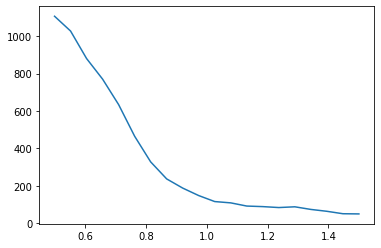

In [274]:
sns.lineplot(x=Eps,y=N)

In [275]:
# Visualisation : réduction de dimension... 

clustering=cluster.DBSCAN(eps=1.4, min_samples=5)
clustering.fit(X)
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

In [276]:
labels = clustering.labels_
from collections import Counter
d = Counter(labels)
d[-1]

# Problème : trop d'outliers -1 (point isolé)


3214

In [234]:

#!pip install umap-learn --ignore-installed llvmlite --user  # marche pas.....

In [277]:
# ACP 

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [278]:
pca = PCA()
pca.fit(df_cct)

PCA()

In [322]:
df_cct_pca = pca.transform(df_cct)
df_cct_pca_df = pd.DataFrame({
    "Dim1" : df_cct_pca[:,0], 
    "Dim2" : df_cct_pca[:,1]})
df_cct_pca_df["labels"] = clustering.labels_
df_cct_pca_df["Merchant State"] = df_cct["Merchant State"]
df_cct_pca_df["Amount"] = df_cct["Amount"]



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


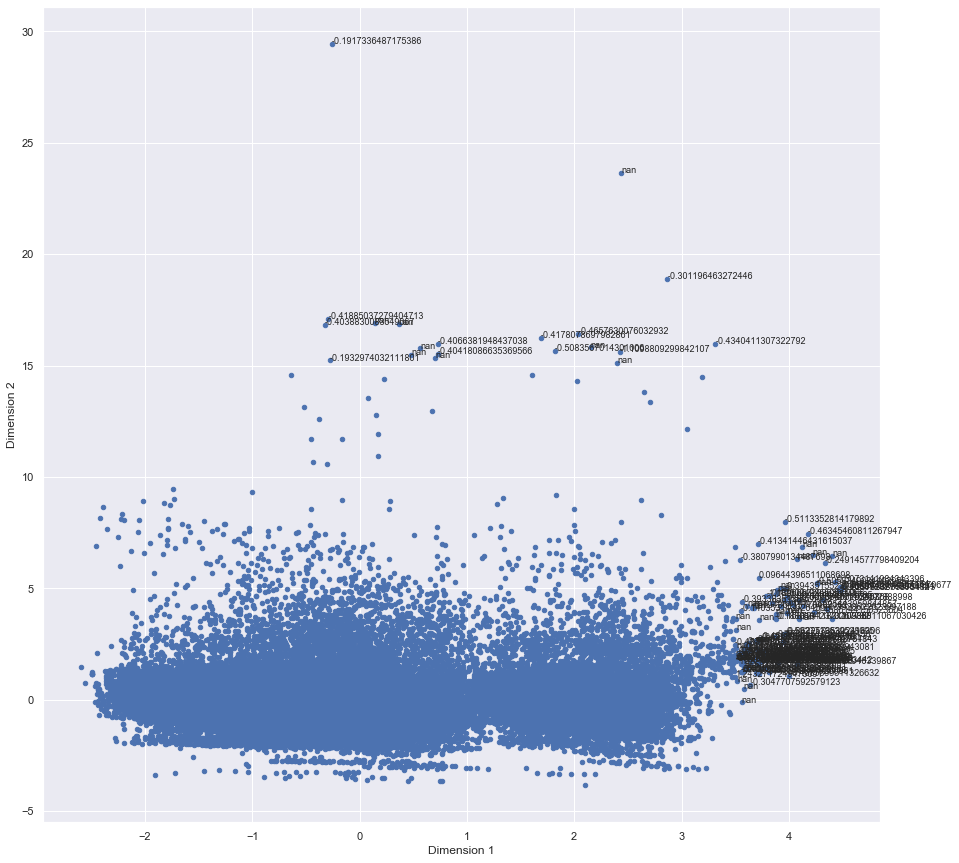

In [324]:
fig, ax = plt.subplots()
df_cct_pca_df.plot.scatter("Dim1", "Dim2", ax = ax)

# boucle sur chaque pays
for k in df_cct_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 15):
        ax.annotate(k[1]["Amount"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1") 
plt.ylabel("Dimension 2")
plt.show()


# But : essayer de comprendre les axes pour pouvoir interpréter les groupes. 
# Regarder un peu à quoi correspond les points extrêmes en termes de type de variables pour interpréter les axes 

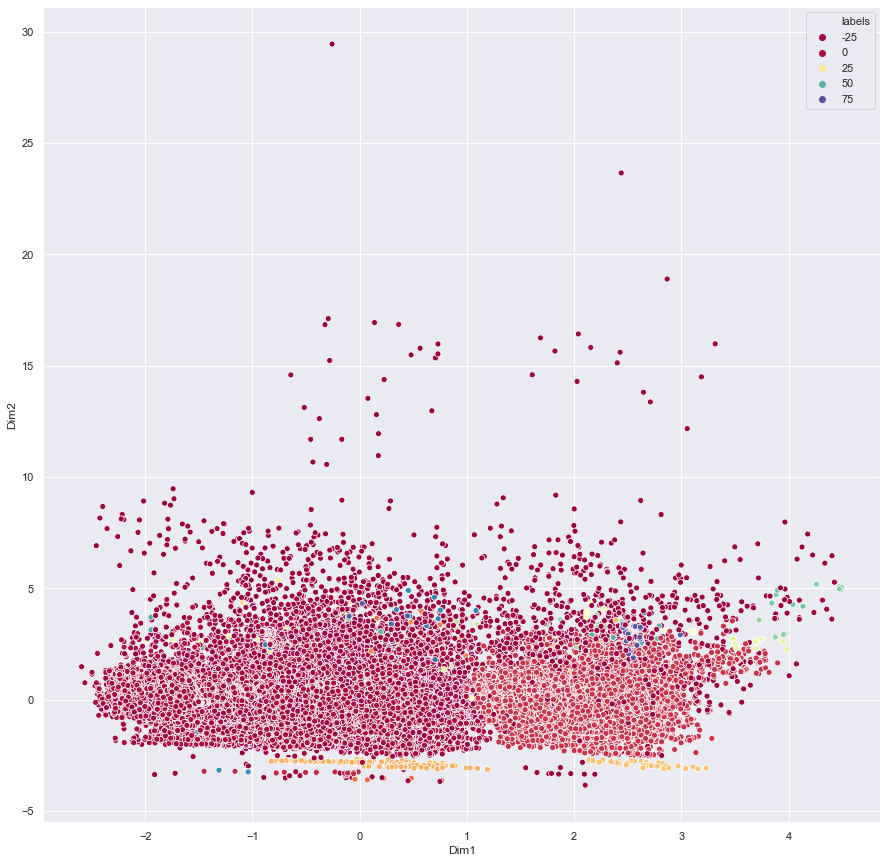

In [317]:

sns.set(rc = {'figure.figsize':(15,15)})
sns.scatterplot(data = df_cct_pca_df, x = "Dim1", y = "Dim2", hue = df_cct_pca_df["labels"], palette="Spectral")


